In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# defining the column names
cols = ['Area','Perimeter','Compactness','Length','Width','Asymmetry Coefficient','Length of kernel Groove','Kernel type']
# reading the .data file using pandas
df = pd.read_csv('seeds_dataset.csv', names=cols, na_values = "?",
                comment = '\t',
                sep= "\t",
                skipinitialspace=True)
#making a copy of the dataframe
data = df.copy()

In [8]:
data.head()

,Area,Perimeter,Compactness,Length,Width,Asymmetry Coefficient,Length of kernel Groove,Kernel type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [16]:
data['Kernel type'].value_counts()

3    70
2    70
1    70
Name: Kernel type, dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length                   210 non-null    float64
 4   Width                    210 non-null    float64
 5   Asymmetry Coefficient    210 non-null    float64
 6   Length of kernel Groove  210 non-null    float64
 7   Kernel type              210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [11]:
data.describe()

,Area,Perimeter,Compactness,Length,Width,Asymmetry Coefficient,Length of kernel Groove,Kernel type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


<AxesSubplot:>

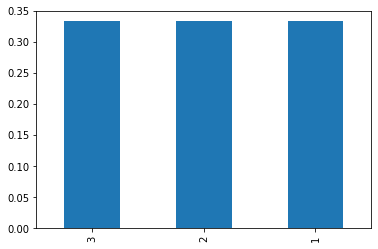

In [15]:
data['Kernel type'].value_counts(normalize=True).plot.bar()

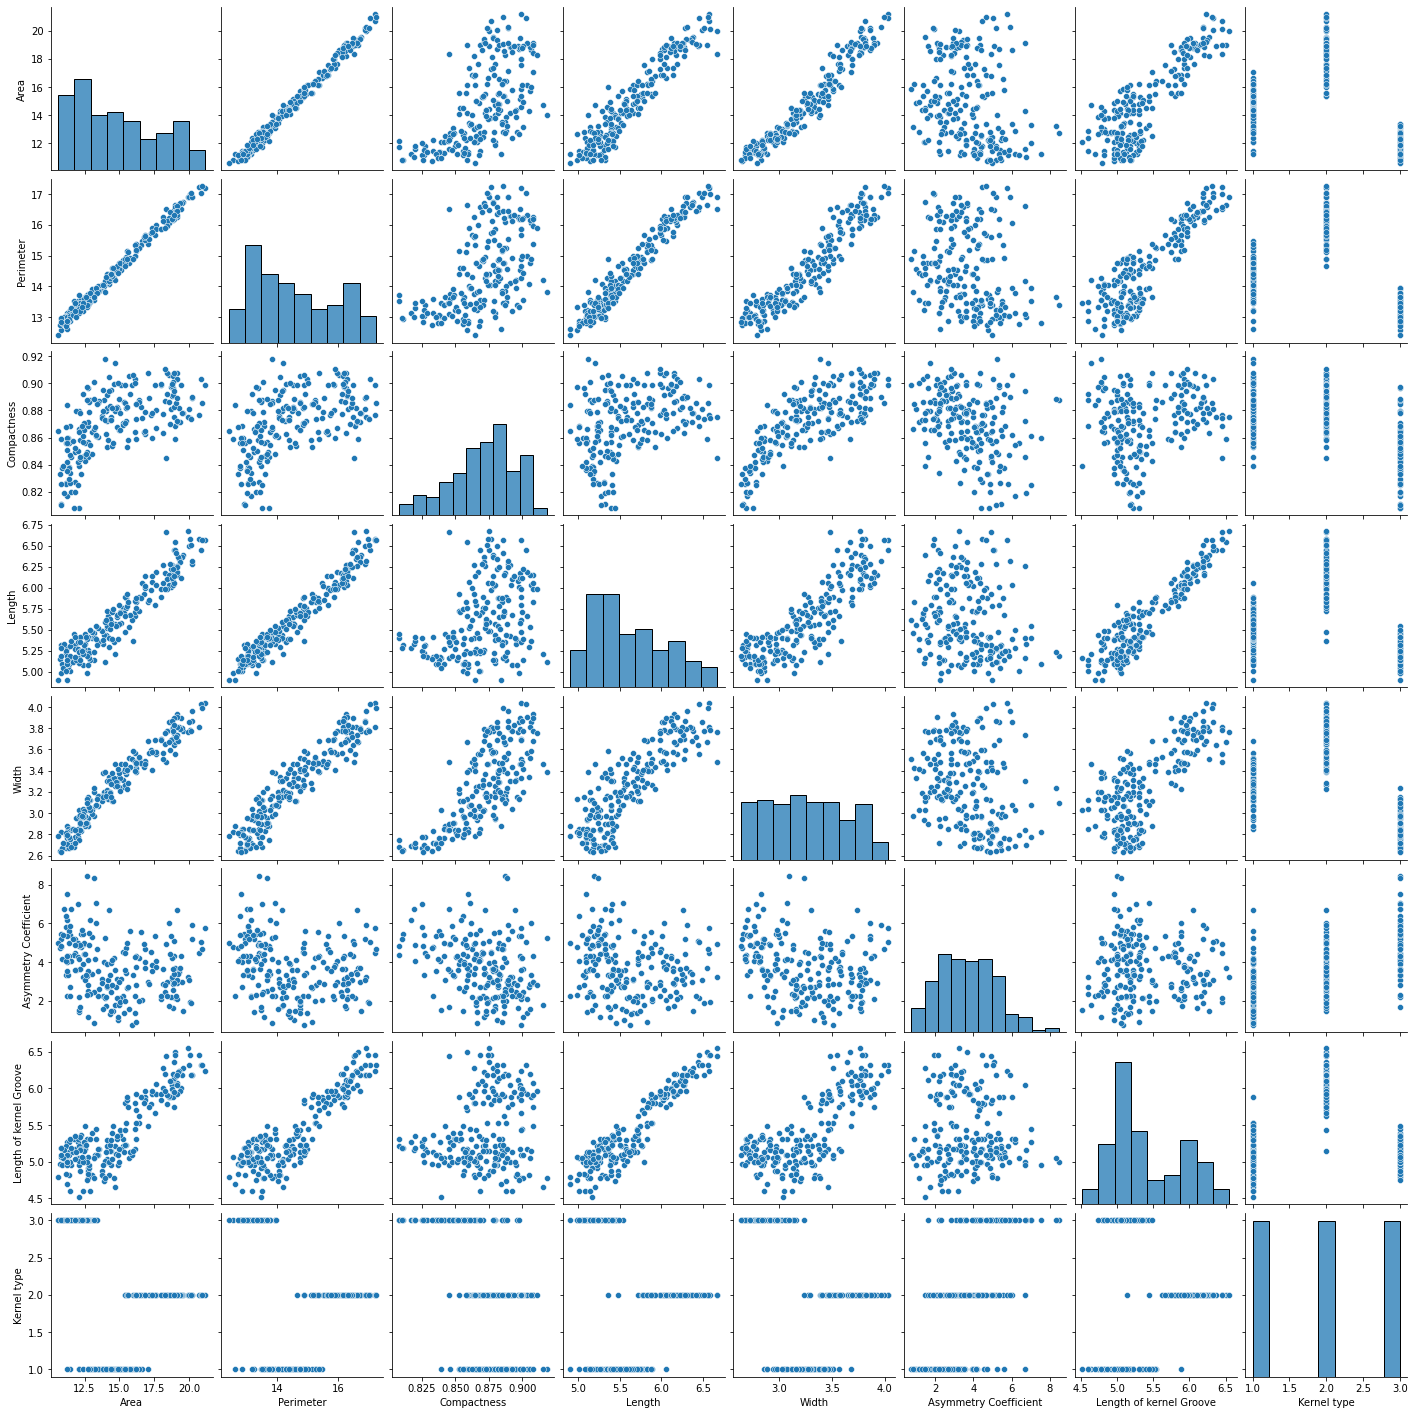

In [14]:
sns.pairplot(data)

## Category distribution

In [27]:
data["Area"].value_counts()

15.38    3
11.23    3
14.11    3
12.70    2
15.26    2
        ..
13.84    1
12.62    1
12.89    1
20.97    1
13.50    1
Name: Area, Length: 193, dtype: int64

In [26]:
data['Perimeter'].value_counts()

13.47    4
13.57    3
13.41    3
13.67    3
13.05    3
        ..
13.36    1
14.39    1
14.94    1
16.32    1
12.72    1
Name: Perimeter, Length: 170, dtype: int64

## Building the training model

### Converting integer classes to Kernel type 


In [32]:
data['Kernel type'] = data['Kernel type'].map({1: 'Kama', 2: 'Rosa', 3 : 'Cananda'})
data.sample(10)

,Area,Perimeter,Compactness,Length,Width,Asymmetry Coefficient,Length of kernel Groove,Kernel type
61,11.23,12.63,0.8840,4.902,2.879,2.2690,4.703,Kama
147,12.49,13.46,0.8658,5.267,2.967,4.4210,5.002,Cananda
136,17.36,15.76,0.8785,6.145,3.574,3.5260,5.971,Rosa
174,10.83,12.96,0.8099,5.278,2.641,5.1820,5.185,Cananda
51,15.78,14.91,0.8923,5.674,3.434,5.5930,5.136,Kama
22,15.88,14.90,0.8988,5.618,3.507,0.7651,5.091,Kama
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,Kama
130,18.30,15.89,0.9108,5.979,3.755,2.8370,5.962,Rosa
85,18.27,16.09,0.8870,6.173,3.651,2.4430,6.197,Rosa
89,20.88,17.05,0.9031,6.450,4.032,5.0160,6.321,Rosa


In [34]:
##one hot encoding
data = pd.get_dummies(data, prefix='', prefix_sep='')
data.head()

,Area,Perimeter,Compactness,Length,Width,Asymmetry Coefficient,Length of kernel Groove,Cananda,Kama,Rosa
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,1,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,1,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,1,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,1,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,1,0
